In [154]:
import pandas as pd
import numpy as np
from custom_detrending import custom_detrending, refine_detrended_flux_err

import matplotlib.pyplot as plt
%matplotlib inline

from altaipony.lcio import from_path, from_mast

from copy import deepcopy

In [ ]:
exc = pd.read_csv("../k2scoc/results/tables/exclude.csv")
exc[exc.why.isin(["too fast rotation"])]

In [207]:
EPIC = 219766926

C = 7
flc = from_path(f"../k2scoc/pony_k2sc_k2_llc_{EPIC}-c{C:02d}_kepler_v2_lc.fits", mode="AltaiPony", mission="K2")

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-0.0.1-py3.6.egg/altaipony/lcio.py:139: ResourceWarning: unclosed file <_io.FileIO name='../k2scoc/pony_k2sc_k2_llc_219766926-c07_kepler_v2_lc.fits' mode='rb' closefd=True>
  return _from_path_AltaiPony(path)


In [208]:
flcd = deepcopy(flc)
flcd.flux = flc.detrended_flux

#flcd = flcd[(flcd.time<2281) | (flcd.time>2282)]
#flcd = flcd[(flcd.time<2287) | (flcd.time>2288)]
flcd = flcd[~np.isnan(flcd.flux) & ~np.isnan(flcd.flux_err) & ~np.isnan(flcd.time)]
flcd = refine_detrended_flux_err(flcd)


In [209]:
flcd = custom_detrending(flcd)

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


SNR at  1.9567838618241065
1.9567838618241065
1.9567838618241065
1.9567838618241065
1.906700744784093
1.906700744784093
1.951630400133327
1.951630400133327
1.9382027704573082
1.9382027704573082
1.9574398258985386
1.9574398258985386
1.9446795804473391
1.9446795804473391
1.9477473154675158
1.9477473154675158
1.9337059609214202
1.9337059609214202
1.9743264294789453
1.9743264294789453
1.9872178137037206
SNR at  0.7234983027679848
SNR at  0.7023319615912208
SNR at  0.7667821195792982
SNR at  0.7406632255738791
SNR at  0.775115296684529
SNR at  0.746867466313334
SNR at  0.7023319615912208
SNR at  0.7262845364548558
SNR at  0.7585847708786936
SNR at  0.8708918532758902
SNR at  0.7023319615912208
SNR at  0.7023319615912208
SNR at  0.7496066717834576
SNR at  0.7691535910800855
SNR at  0.7023319615912208
SNR at  0.7646673734385768
SNR at  0.7389710455227825
SNR at  0.7415684471640153
SNR at  0.7293018738533718
SNR at  1.061056976688391
1.061056976688391
1.061056976688391
1.061056976688391
1.0529

IndexError: list index out of range

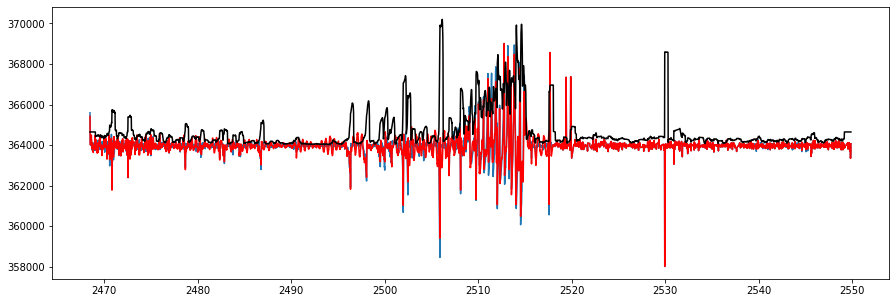

In [212]:
plt.figure(figsize=(15,5))
plt.plot(flc.time, flc.detrended_flux)
#plt.plot(flc.time, flc.flux)
plt.plot(flcd.time, flcd.detrended_flux, c="r");
plt.plot(flcd.time, np.median(flcd.detrended_flux)+3*flcd.detrended_flux_err, c="k");
#plt.xlim(3270,3280)
#plt.ylim(1.413e7,1.42e7)

In [104]:
flcd.detrended_flux_err[:] = np.nanmedian(flcd.detrended_flux_err)

In [203]:
flcd = refine_detrended_flux_err(flcd)

In [213]:
flares = flcd.find_flares().flares
flares

Found 36 candidate(s) in the (0,2297) gap.
Found 0 candidate(s) in the (2301,2361) gap.
Found 0 candidate(s) in the (2361,2375) gap.
Found 0 candidate(s) in the (2375,2422) gap.
Found 0 candidate(s) in the (2431,2459) gap.
Found 0 candidate(s) in the (2482,2533) gap.
Found 0 candidate(s) in the (2546,2597) gap.
Found 0 candidate(s) in the (2600,2616) gap.
Found 0 candidate(s) in the (2616,2644) gap.
Found 0 candidate(s) in the (2659,2718) gap.
Found 0 candidate(s) in the (2726,2776) gap.
Found 0 candidate(s) in the (2776,2791) gap.
Found 0 candidate(s) in the (2791,2805) gap.
Found 0 candidate(s) in the (2805,2833) gap.
Found 0 candidate(s) in the (2833,2860) gap.
Found 0 candidate(s) in the (2860,2876) gap.
Found 0 candidate(s) in the (2876,2916) gap.
Found 0 candidate(s) in the (2916,2943) gap.
Found 0 candidate(s) in the (2946,2975) gap.
Found 0 candidate(s) in the (2975,3014) gap.
Found 0 candidate(s) in the (3014,3184) gap.
Found 0 candidate(s) in the (3184,3265) gap.
Found 0 cand

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,total_n_valid_data_points
0,455,458,115966.0,115969.0,2478.539242,2478.600539,5.951245,0.911215,0.001468,3449.0
1,594,597,116115.0,116118.0,2481.583621,2481.644917,4.612137,0.635924,0.001067,3449.0
2,612,618,116134.0,116140.0,2481.971830,2482.094422,8.515874,0.881166,0.001135,3449.0
3,671,681,116196.0,116206.0,2483.238615,2483.442935,11.111322,0.535684,0.000914,3449.0
4,752,759,116280.0,116287.0,2484.954902,2485.097926,7.729489,0.545156,0.000811,3449.0
5,776,784,116304.0,116312.0,2485.445269,2485.608725,10.040429,0.853171,0.000879,3449.0
6,817,820,116346.0,116349.0,2486.303411,2486.364707,3.302905,0.416444,0.000868,3449.0
7,863,870,116393.0,116400.0,2487.263712,2487.406736,6.001071,0.449843,0.000623,3449.0
8,952,958,116485.0,116491.0,2489.143448,2489.266039,3.768861,0.388385,0.000423,3449.0
9,1050,1057,116585.0,116592.0,2491.186635,2491.329658,8.836056,0.460153,0.000889,3449.0


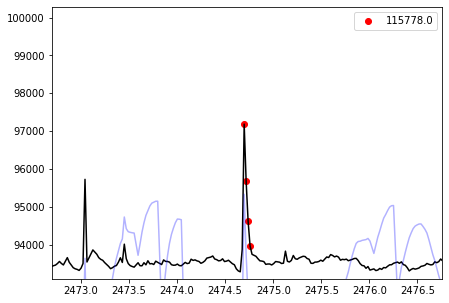

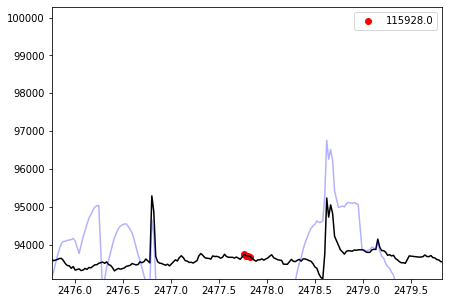

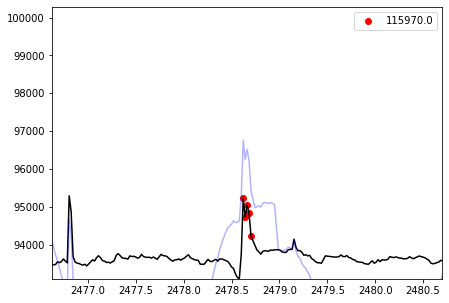

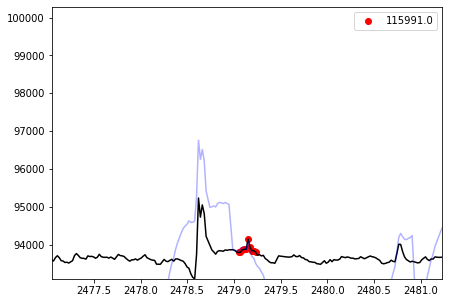

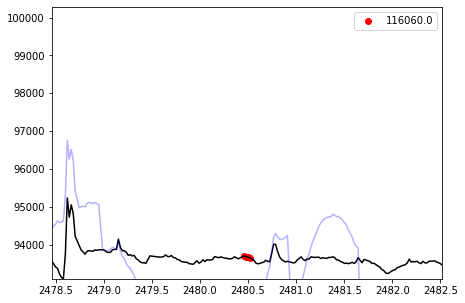

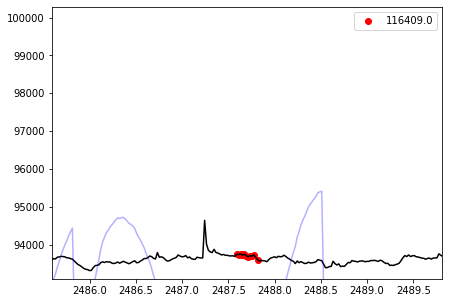

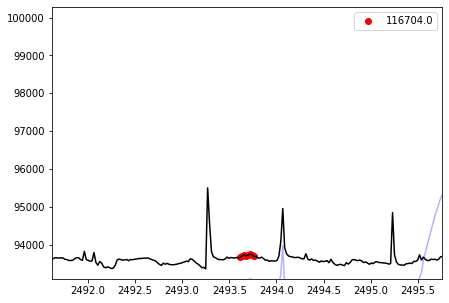

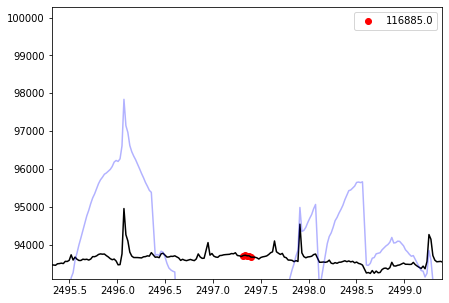

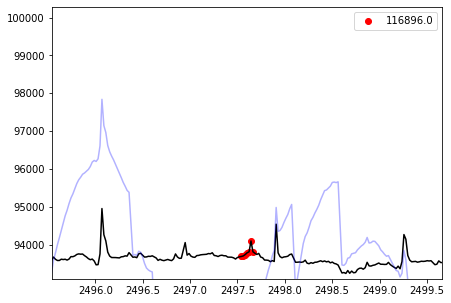

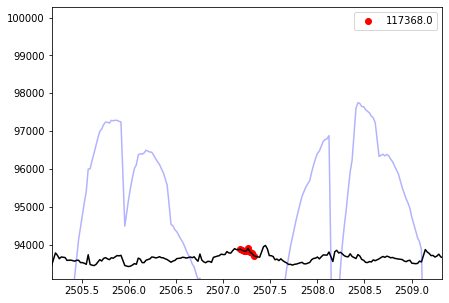

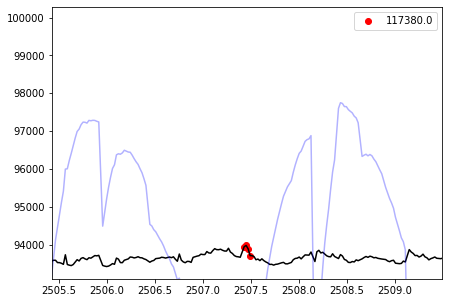

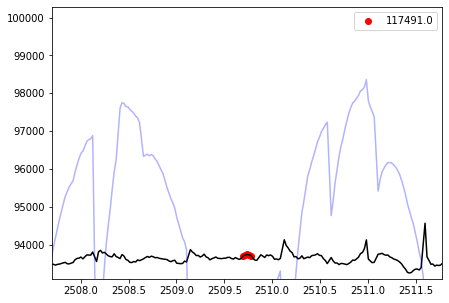

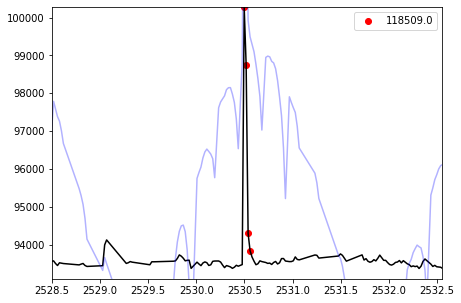

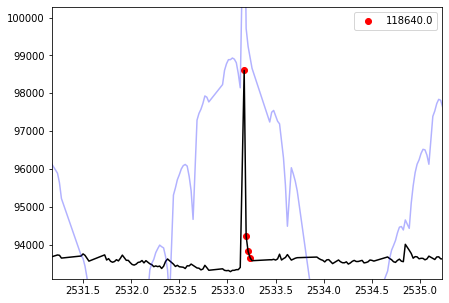

In [205]:
for i, r in flares.iterrows():
    plt.figure(figsize=(7,5))
    plt.plot(flcd.time, flcd.detrended_flux,c="k")
    plt.plot(flc.time, flc.flux,c="b", alpha=.3)
    sta, sto = int(r.istart), int(r.istop)
    plt.scatter(flcd.time[sta:sto], flcd.detrended_flux[sta:sto], c="r", label=r.cstart)#, label=f"EPIC {EPIC}, C{C}")#
    plt.xlim(r.tstart-2,r.tstop+2)
    plt.ylim(np.min(1.*flcd.detrended_flux),1.*np.max(flcd.detrended_flux))
    plt.legend()

In [206]:
with open("../k2scoc/results/tables/custom_detrended_flares.csv", "a") as f:
    flares["C"] = C
    flares["EPIC"] = EPIC
    flares.to_csv(f,index=False, header=False)

In [ ]:
from lightkurve import search_lightcurvefile, search_targetpixelfile

In [ ]:
lcs = search_lightcurvefile("GJ 1151")